In [1]:
import numpy as np
import os

def load_numpy_arrays(directory):
    """
    Loads all numpy arrays (.npy files) from a given directory.

    Args:
        directory (str): The path to the directory containing the .npy files.

    Returns:
        dict: A dictionary where keys are filenames (without .npy extension)
              and values are the corresponding numpy arrays.
              Returns an empty dictionary if no .npy files are found or the directory doesn't exist.
    """

    arrays = {}
    if not os.path.exists(directory):
        print(f"Directory '{directory}' does not exist.")
        return arrays

    for filename in os.listdir(directory):
        if filename.endswith(".npy"):
            filepath = os.path.join(directory, filename)
            try:
                array = np.load(filepath)
                arrays[os.path.splitext(filename)[0]] = array #remove the .npy extention.
            except Exception as e:
                print(f"Error loading {filename}: {e}")

    return arrays

# Example usage:
directory_path = "HITS-FEB-10" # Replace with your directory
loaded_arrays = load_numpy_arrays(directory_path)
len(loaded_arrays)


53

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
Error loading and plotting hit_100000000_1739235841_12.npy: index 10 is out of bounds for axis 0 with size 10


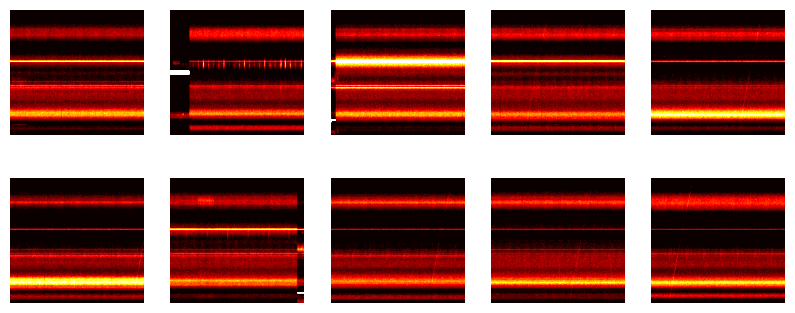

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

def load_and_plot_numpy_images(directory, num_images=50, grid_size=(2, 5)):
    """
    Loads and plots a specified number of numpy images from a directory in a grid.

    Args:
        directory (str): The path to the directory containing the .npy image files.
        num_images (int, optional): The number of images to load and plot. Defaults to 25.
        grid_size (tuple, optional): The grid dimensions (rows, columns). Defaults to (5, 5).
    """

    arrays = {}
    if not os.path.exists(directory):
        print(f"Directory '{directory}' does not exist.")
        return

    image_files = [f for f in os.listdir(directory) if f.endswith(".npy")]
    image_files = image_files[:num_images] #take only the first num_images

    if not image_files:
        print("No .npy image files found in the directory.")
        return

    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(10, 4)) # Adjust figsize as needed
    axes = axes.flatten() #flattens the 2d array of axes into a 1d array.

    count = 0
    data = []
    for i, filename in enumerate(image_files):
        filepath = os.path.join(directory, filename)
        confidence = float(filename.split('_')[1])/1e6
        if confidence > 99.99:
            try:
                array = np.load(filepath)
                data.append(array)
                arrays[os.path.splitext(filename)[0]] = array
    
                axes[count].imshow(array,aspect = 10, vmin = 104557, vmax = 254557.824, cmap='hot')  # Display the image
                # axes[i].set_title(os.path.splitext(filename)[0])
                axes[count].axis('off')  # Turn off axis labels
                count +=1
                # Add x-axis for bottom row
                if i >= 0: #bottom row
                    print('hello')
                    # axes[count].set_xticks([]) #remove default ticks, but leave axis
                    axes[count].set_xlabel("X-axis")
    
                # Add y-axis for leftmost column
                if i % grid_size[1] == 0: #left most column
                    # axes[count].set_yticks([]) #remove default ticks, but leave axis
                    axes[count].set_ylabel("Y-axis")
                else:
                    axes[count].axis('off') #turn off other axes.

            
            except Exception as e:
                print(f"Error loading and plotting {filename}: {e}")

    # Hide any unused subplots if num_images is less than grid_size[0] * grid_size[1]
    # for j in range(len(image_files), grid_size[0] * grid_size[1]):
        # axes[j].axis('off')

    # plt.tight_layout() #adjust subplot parameters
    plt.show()
    return data

# Example usage:
directory_path = "HITS-FEB-10" # Replace with your directory
data = load_and_plot_numpy_images(directory_path)

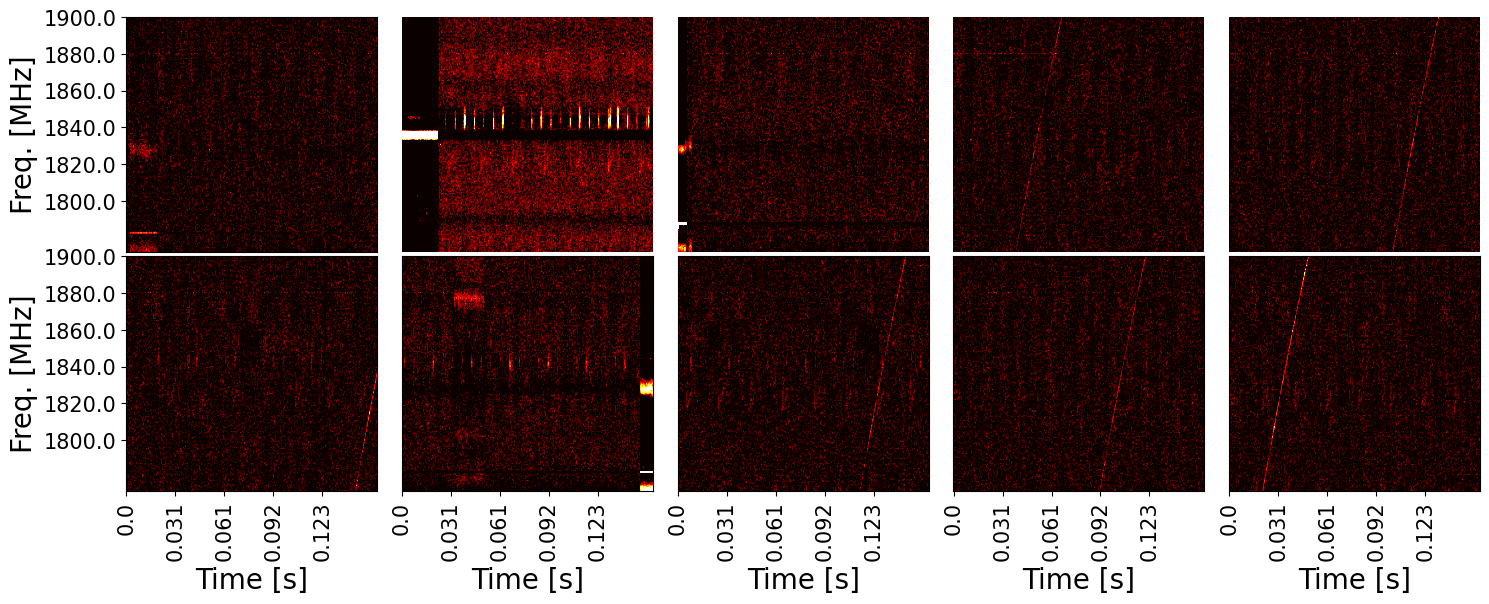

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a 2x5 grid of subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Adjust figsize as needed

# Generate some sample data (replace with your actual data)
# data = [np.random.rand(50, 50) for _ in range(10)]

# Loop through the grid and display images using imshow
count = 0
for i in range(2):
    for j in range(5):
        index = i * 5 + j
        result = np.repeat(np.mean(data[index], axis = 1)[:,None], 2048, axis=1) 
        axes[i, j].imshow(data[index]/result, vmin = 1, vmax = 1.5, cmap='hot', aspect = 10)  # You can change the colormap

        # axes[i, j].imshow(data[index]-result, vmin = 124557, vmax = 174557.824, cmap='hot', aspect = 10)  # You can change the colormap
        # axes[i, j].set_title(f'C {index + 1}')
        Y_LABELS = np.linspace(1900, 1800, data[index].shape[0]//30)
        spaces_y = np.arange(0,data[index].shape[0], 30 )[:-1]
        axes[i, j].set_yticks(spaces_y) 
        axes[i, j].set_yticklabels(Y_LABELS, fontsize = 15) 

        x_LABELS = np.linspace(0, 2048*6e-5, data[index].shape[1]//400)
        x_LABELS = np.around(x_LABELS, decimals=3)
        spaces_x = np.arange(0,data[index].shape[1], 400 )[:-1]
        axes[i, j].set_xticks(spaces_x) 
        axes[i, j].set_xticklabels(x_LABELS, rotation=90, fontsize = 15) 
        axes[i, j].set_xlabel('Time [s]', fontsize = 20) 
        axes[i, j].set_ylabel('Freq. [MHz]', fontsize = 20) 
        if j > 0 and i==0:
            axes[i, j].axis('off')  # Remove axis ticks and labels
        if j==0 and i ==0:
            axes[i, j].set_xticks([]) 
            axes[i, j].set_xlabel('')
        if j>=1 and i ==1:
            axes[i, j].set_yticks([]) 
            axes[i, j].set_ylabel('')

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.savefig('hits_crab.pdf', format='pdf')
# Show the plot
plt.show()

In [18]:
filtered_data = []
skip = [0,1,2,6]
for i in range(10):
    if i in skip:
        pass
    else:
        filtered_data.append(data[i])

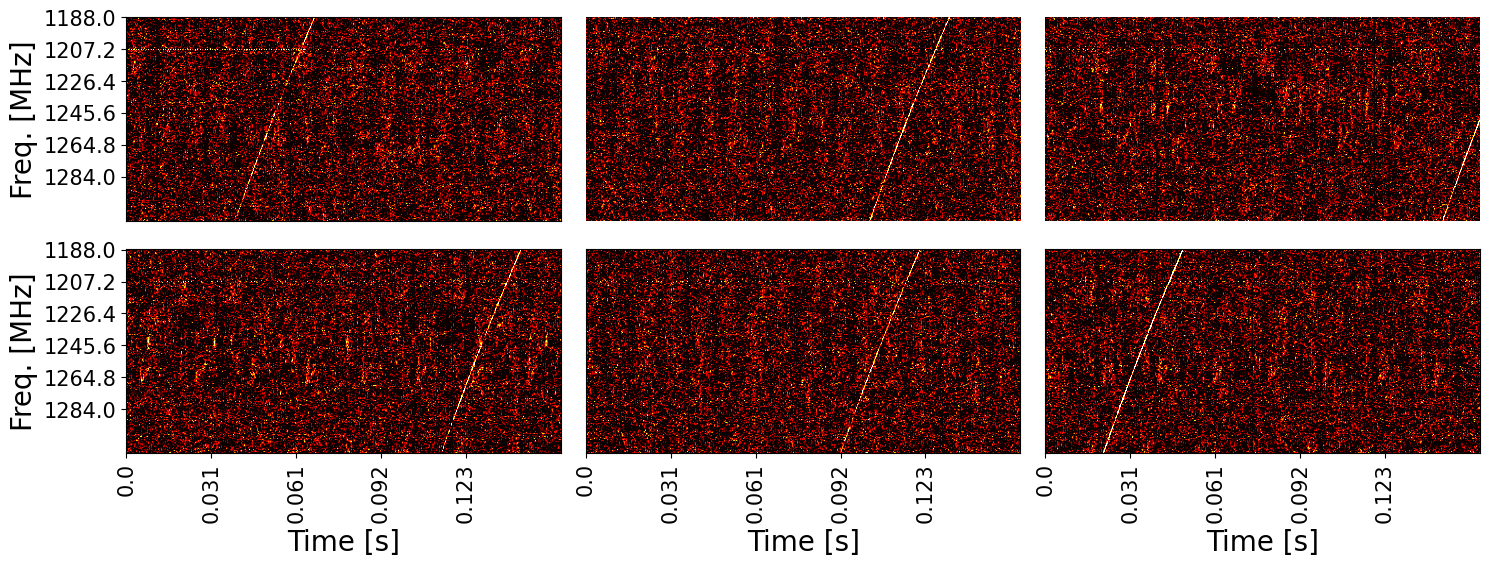

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a 2x5 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 6))  # Adjust figsize as needed

# Generate some sample data (replace with your actual data)
# data = [np.random.rand(50, 50) for _ in range(10)]

# Loop through the grid and display images using imshow
skip = [0,1,2,6]
count = 0
for i in range(2):
    for j in range(3):
        index = i * 3 + j
     
        result = np.repeat(np.mean(filtered_data[index], axis = 1)[:,None], 2048, axis=1) 
        axes[i, j].imshow(filtered_data[index]/result, vmin = 1, vmax = 1.2, cmap='hot', aspect = 5)  # You can change the colormap

        # axes[i, j].imshow(data[index]-result, vmin = 124557, vmax = 174557.824, cmap='hot', aspect = 10)  # You can change the colormap
        # axes[i, j].set_title(f'C {index + 1}')
        Y_LABELS = np.linspace(1284.0, 1188.0, data[index].shape[0]//30)[::-1]
        spaces_y = np.arange(0,filtered_data[index].shape[0], 30 )[:-1]
        axes[i, j].set_yticks(spaces_y) 
        axes[i, j].set_yticklabels(Y_LABELS, fontsize = 15) 

        x_LABELS = np.linspace(0, 2048*6e-5, data[index].shape[1]//400)
        x_LABELS = np.around(x_LABELS, decimals=3)
        spaces_x = np.arange(0,filtered_data[index].shape[1], 400 )[:-1]
        axes[i, j].set_xticks(spaces_x) 
        axes[i, j].set_xticklabels(x_LABELS, rotation=90, fontsize = 15) 
        axes[i, j].set_xlabel('Time [s]', fontsize = 20) 
        axes[i, j].set_ylabel('Freq. [MHz]', fontsize = 20) 
        if j > 0 and i==0:
            axes[i, j].axis('off')  # Remove axis ticks and labels
        if j==0 and i ==0:
            axes[i, j].set_xticks([]) 
            axes[i, j].set_xlabel('')
        if j>=1 and i ==1:
            axes[i, j].set_yticks([]) 
            axes[i, j].set_ylabel('')

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.savefig('hits_crab.pdf', format='pdf')
# Show the plot
plt.show()

In [15]:
1236 - 0.5 * 192/2

1188.0